# **Exploratory Data Analysis on a Sample Dataset**

This project involves performing an exploratory data analysis (EDA) on the Titanic dataset, which is publicly available. The goal is to analyze the dataset to understand the distributions, correlations, and missing values. Additionally, key insights will be visualized using graphs to provide a comprehensive understanding of the data.

## **1.0 Import Libraries**

In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

## **2.0 Load Dataset**

In [73]:
# Load the Titanic dataset
df = pd.read_csv("../Data/Titanic-Dataset.csv")

# Sneak peek of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **3.0 Data Exploration**

In [74]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

- **Age**

In [77]:
df["Age"].isnull().sum()/len(df)*100

np.float64(19.865319865319865)

- As age is not normal and there are many missing values, we will replace them with the median value.

In [78]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

In [79]:
print(df["Age"].isnull().any())

False


- **Cabin**

In [80]:
df["Cabin"].isnull().sum()/len(df)*100

np.float64(77.10437710437711)

- As Cabin has too many missing values, we will drop the column.

In [81]:
# Dropping Cabin
df.drop('Cabin', axis=1, inplace=True)

- **Embarked**

In [82]:
(df["Embarked"].isnull().sum()/len(df)*100)

np.float64(0.22446689113355783)

- As values are very small in number, we will drop the missing values.

In [83]:
# Drop rows with missing 'Embarked' values
df.dropna(subset=['Embarked'], inplace=True)

In [84]:
# Verify missing values after handling
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **4.0 Data Visualization and Analysis**

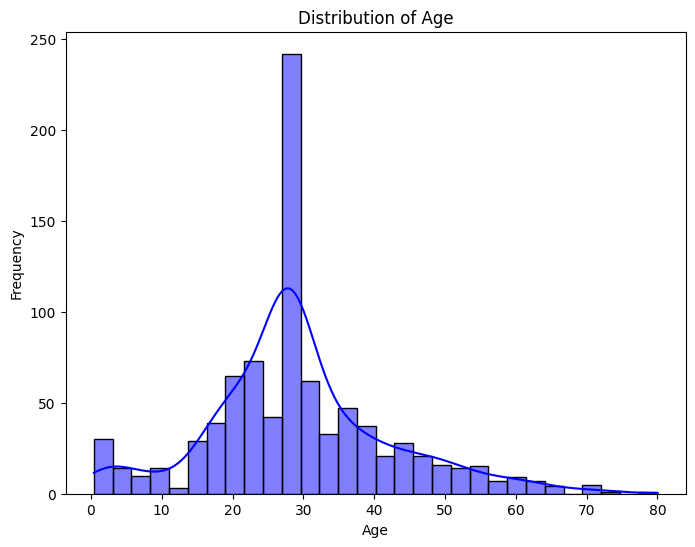

In [47]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

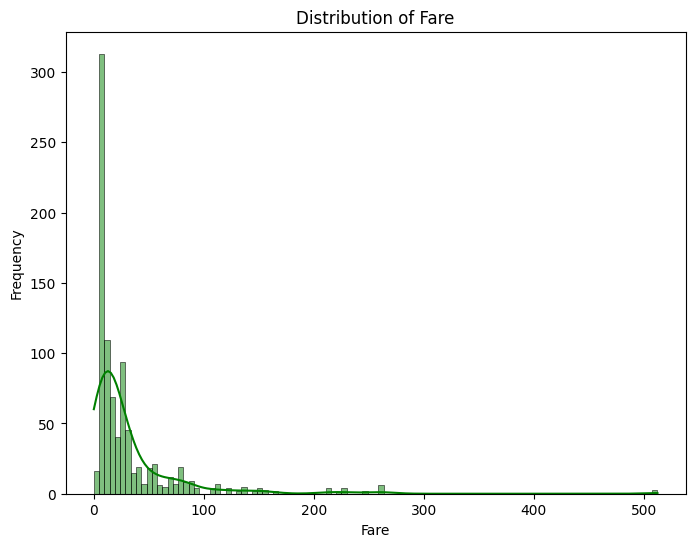

In [48]:
# Distribution of Fare
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

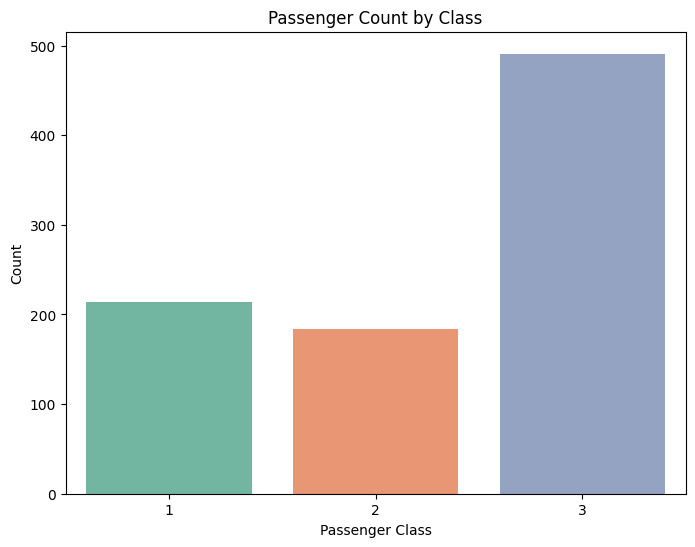

In [49]:
# Count of passengers by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

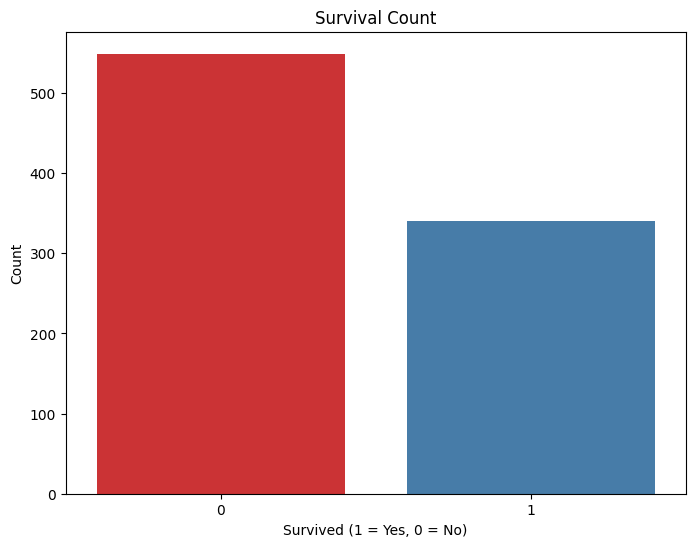

In [50]:
# Survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Count')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

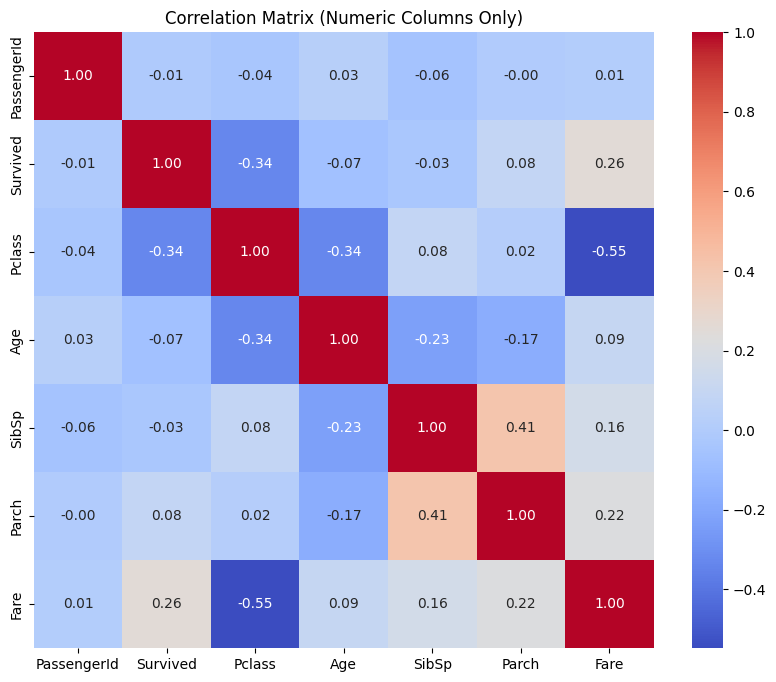

In [51]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Columns Only)')
plt.show()

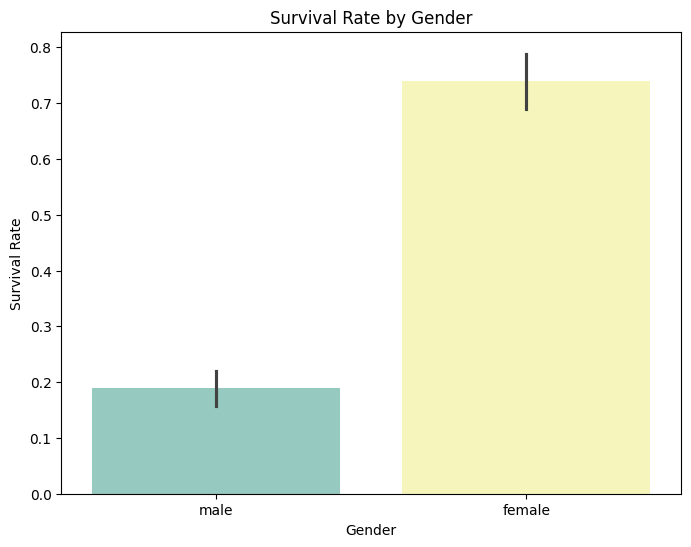

In [52]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

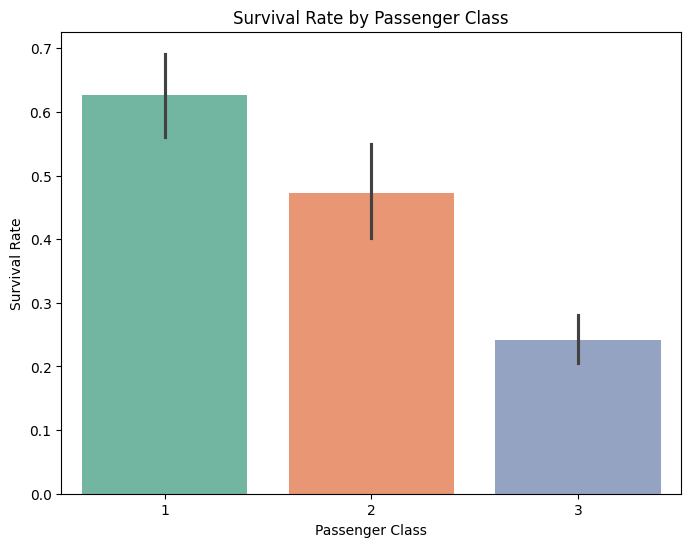

In [53]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

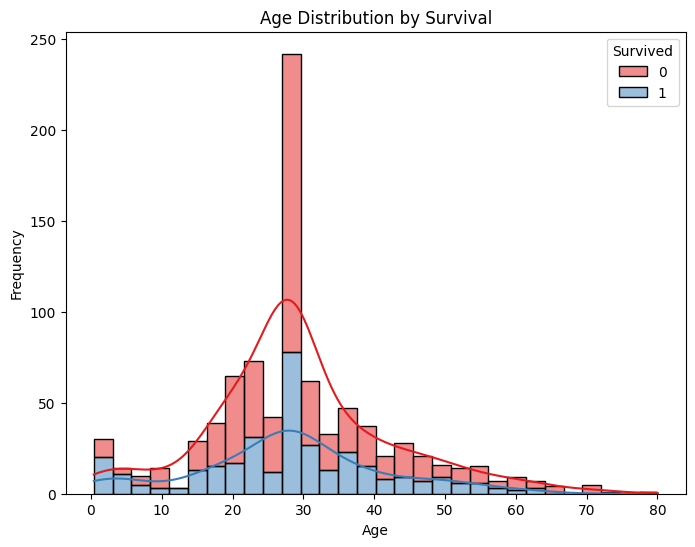

In [54]:
# Age distribution by survival
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True, multiple='stack', palette='Set1')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

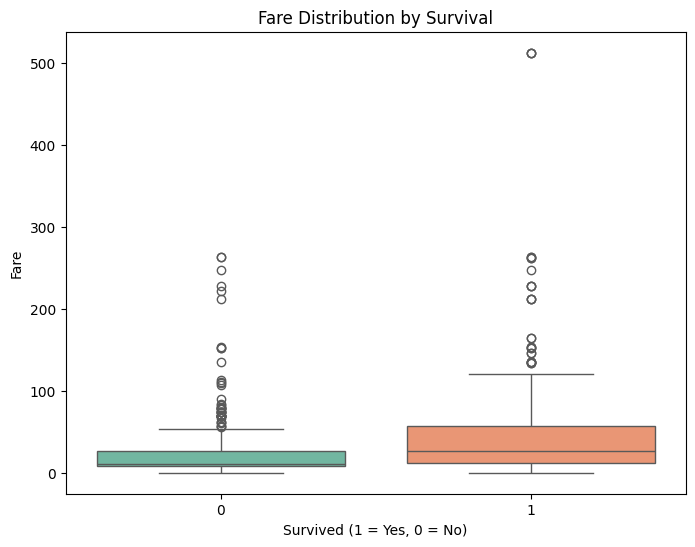

In [55]:
# Fare distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='Set2')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Fare')
plt.show()

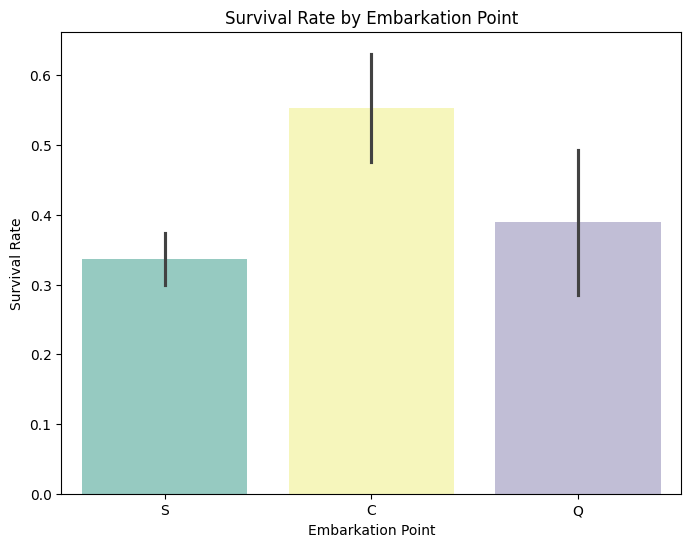

In [56]:
# Survival rate by embarkation point
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=df, palette='Set3')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

# Summary of insights

1. Survival Rate: Approximately 38% of passengers survived.
2. Gender: Female passengers had a significantly higher survival rate than males.
3. Passenger Class: Passengers in first class had a higher survival rate compared to those in second and third classes.
4. Age: Younger passengers (children) had a higher survival rate.
5. Fare: Passengers who paid higher fares had a better chance of survival.
6. Embarkation Point: Passengers who embarked from Cherbourg had a higher survival rate.